In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/df.csv')
df_session=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/session_pre.csv')



In [66]:
df_session=df_session.drop(['Unnamed: 0'],axis=1)

In [67]:
df=df.drop(['Unnamed: 0'],axis=1)

In [68]:
df_session.rename(columns={"user_id":"id"},inplace=True)

In [69]:
df_target=df[['id','cat_duration']]

In [70]:
df_target

id cat_duration
0      87mebub9p4            S
1      osr2jwljor            F
2      lsw9q7uk0j            S
3      0d01nltbrs            S
4      a1vcnhxeij            S
...           ...          ...
86955  7plqriggxp            F
86956  msucfwmlzc            S
86957  omlc9iku7t            S
86958  0k26r3mir0            S
86959  qbxza0xojf            F

[86960 rows x 2 columns]

In [71]:
# 나중에 두가지 그룹으로 분류 하는데 그때 쓰기 위해 
merge_left = pd.merge(df_session,df_target, how='left', left_on='id', right_on='id')



In [72]:
merge_left.isnull().sum()

id                     0
action                 0
device_type            0
secs_elapsed           0
action_type            0
action_detail          0
cat_duration     7902887
dtype: int64

In [73]:
merge_left=merge_left.dropna()

In [74]:
merge_left.isnull().sum()

id               0
action           0
device_type      0
secs_elapsed     0
action_type      0
action_detail    0
cat_duration     0
dtype: int64

In [75]:
is_s=merge_left['cat_duration']=='S'
is_f=merge_left['cat_duration']=='F'

In [76]:
# 나중에 중요하다. 
subset_s = merge_left[is_s]
subset_f = merge_left[is_f]

In [77]:
# 어떠한 detail action을 사용할지 결정 
# 2.3.2. 차집합을 이용한 ‘Anti join’ 방법 
subset_s1= pd.DataFrame(subset_s.action_detail.value_counts(sort=True))
subset_f1= pd.DataFrame(subset_f.action_detail.value_counts(sort=True))


In [78]:
list_s=subset_s1.head(50).index

In [79]:
list_f=subset_f1.head(50).index

In [80]:
#중복된거 뺀다.
re_s=list_s.difference(list_f)

In [81]:
#중복된거 뺀다. 
re_f=list_f.difference(list_s)

In [82]:
#action_detail top 50개중 Slow 그룹이 주로 하는 detail들이다 .
re_s

Index(['list_your_space', 'listing_recommendations', 'listing_reviews_page',
       'manage_listing', 'signup', 'update_listing_description', 'wishlist'],
      dtype='object')

In [83]:
# action_detail top 50개중 Fast 그룹이 주로 하는 detail들이다 .
# 결론적으로 fast 사람과 slow 사람이 주로 하는 행동의 차이점을 알수 있다. 
re_f

Index(['apply_coupon', 'at_checkpoint', 'message_to_host_focus', 'p4',
       'pending', 'post_checkout_action', 'request_new_confirm_email'],
      dtype='object')

In [84]:
# 2.3.4. 각 그룹 별 유의한 차이의 횟수를 가진 행동들에 대한 선별
mean_s=subset_s1['action_detail'].values.mean()
mean_f=subset_f1['action_detail'].values.mean()
subset_s1['average_divide']=0


In [85]:
mean_s

9966.683333333332

In [86]:
subset_f1['average_divide']=0
subset_s1=subset_s1.astype({'action_detail':'float'})
subset_f1=subset_f1.astype({'action_detail':'float'})
subset_s1['average_divide']=subset_s1['action_detail']/mean_s
subset_f1['average_divide']=subset_f1['action_detail']/mean_f
sub=subset_s1-subset_f1

In [87]:
sub

action_detail  average_divide
-unknown-                           -57894.0       -6.365206
account_notification_settings        -1313.0       -0.142238
account_payout_preferences             112.0        0.010061
account_privacy_settings               -40.0       -0.004533
account_transaction_history           -132.0       -0.014136
...                                      ...             ...
wishlist_content_update              22636.0        1.962591
wishlist_note                          145.0        0.014189
your_listings                         1567.0        0.150674
your_reservations                       13.0        0.001092
your_trips                           -8586.0       -0.899106

[126 rows x 2 columns]

In [88]:
sub.loc[(sub.average_divide<1) & (sub.average_divide>-1), 'average_divide'] = np.nan
sub.dropna(subset=['average_divide'],inplace=True)


In [89]:
sub

action_detail  average_divide
-unknown-                     -57894.0       -6.365206
message_post                   -9677.0       -1.039409
message_thread                -20490.0       -2.167892
p3                             45597.0        3.964493
p5                            -19283.0       -2.006092
update_listing                 27834.0        2.765159
view_search_results            50353.0        4.490416
wishlist_content_update        22636.0        1.962591

In [90]:
detail_s=['p3','update_listing','view_search_result','wishlist_content_update']
detail_f=['-unknown-','message_post','message_thread']





In [91]:
subset_s1.loc[subset_s1.average_divide <=0.5, 'average_divide'] = np.nan
subset_s1.dropna(subset=['average_divide'],inplace=True)

In [92]:
subset_f1.loc[subset_f1.average_divide <=0.5, 'average_divide'] = np.nan
subset_f1.dropna(subset=['average_divide'],inplace=True)


In [93]:
sel_s1=subset_s1.index

In [94]:
sel_f1=subset_f1.index

In [95]:
rem_s1=sel_s1.difference(sel_f1)
rem_f1=sel_f1.difference(sel_s1)

In [96]:
rem_s1

Index([], dtype='object')

In [97]:
rem_f1

Index(['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips'],
      dtype='object')

In [98]:
# 선별 결과 행동 디테일의 결과가 이렇다 
final_S_detail=['p3','update_listing','view_search_result','wishlist_content_update']
final_F_detail=['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips','message_post','message_thread']

In [99]:
# 총 웹 로그 활동 수 

sessions_new = pd.DataFrame(merge_left.id.value_counts(sort=False))
sessions_new['action_count'] = sessions_new.id
sessions_new['id'] = sessions_new.index
sessions_new = sessions_new.reset_index(drop=True)

sessions_new

id  action_count
0      q20uzzuev8             8
1      1vg2u0ijbj            77
2      twqdhzzonb           301
3      rbtiq1g2xk             1
4      ju5dn2unqw           134
...           ...           ...
28722  vmg2yk300k            90
28723  3kmep45f97            29
28724  hr6a81tfnk            56
28725  ixienr4bq5            52
28726  aihl9y2vq5            82

[28727 rows x 2 columns]

In [100]:
# 아이디별 총 웹 이용시간 
secs_df = pd.DataFrame(merge_left.groupby('id')['secs_elapsed'].sum())


In [101]:
sessions_new = pd.merge(sessions_new,secs_df, how='inner',on='id')

In [102]:
sessions_new.isnull().sum()

id              0
action_count    0
secs_elapsed    0
dtype: int64

In [103]:
df_session_detail=df_session[['id','action_detail']]

catvar=['action_detail']
for c in catvar:
    temp=pd.get_dummies(df_session_detail[c],prefix=c, drop_first=True)
    df_session_detail=pd.concat((df_session_detail,temp),axis=1)
    
df_session_detail=df_session_detail.drop(catvar,axis=1)

df_d=pd.pivot_table(df_session_detail, index = ['id'], aggfunc = 'sum')


In [104]:
sessions_new.rename(columns={"secs_elapsed":"total_secs"},inplace=True)

In [105]:
def most_frequent_value(merge_df, feature):
    # Group by the users and find the value counts of the feature
    new_df = pd.DataFrame(merge_left.groupby('id')[feature].value_counts())
    # The index is a tuple, and we need to seperate it, so let's create a new feature from it.
    new_df['index_tuple'] = new_df.index
    # The new columns are the features created from the tuple.
    new_columns = ['id',feature]
    for n,col in enumerate(new_columns):
        new_df[col] = new_df.index_tuple.apply(lambda index_tuple: index_tuple[n])
    
    # Drop the old index (the tuple index)
    new_df = new_df.reset_index(drop = True)
    # Drop the unneeded feature
    new_df = new_df.drop('index_tuple', axis = 1)
    # Select the first value for each user, its most common
    new_df = new_df.groupby('id').first()
    
    # Set user_id equal to the index, then reset the index
    new_df['id'] = new_df.index
    new_df = new_df.reset_index(drop = True)
    
    merge_df = merge_df.merge(new_df)
    
    return merge_df

sessions_feature = ['action', 'action_type', 'action_detail', 'device_type']

for feature in sessions_feature:
    sessions_new = most_frequent_value(sessions_new, feature)


In [106]:
sessions_new

id  action_count  total_secs          action action_type  \
0      q20uzzuev8             8         168           click       click   
1      1vg2u0ijbj            77        1824            show        view   
2      twqdhzzonb           301        6966            show        view   
3      rbtiq1g2xk             1          24          create      submit   
4      ju5dn2unqw           134        3141  search_results        view   
...           ...           ...         ...             ...         ...   
28722  vmg2yk300k            90        2127            show        view   
28723  3kmep45f97            29         624            show        view   
28724  hr6a81tfnk            56        1325            edit        view   
28725  ixienr4bq5            52        1194            show        view   
28726  aihl9y2vq5            82        1927          update        view   

             action_detail      device_type  
0             message_post           iPhone  
1                       p3      Mac Desktop  
2             user_profile           iPhone  
3                   signup        -unknown-  
4      view_search_results  Windows Desktop  
...                    ...              ...  
28722            -unknown-  Windows Desktop  
28723            dashboard      Mac Desktop  
28724         edit_profile  Windows Desktop  
28725            -unknown-      Mac Desktop  
28726       update_listing  Windows Desktop  

[28727 rows x 7 columns]

In [107]:
union = list(set().union(final_S_detail,final_F_detail))


In [108]:
li_1=[]
for i in union:
    li_1.append('action_detail_'+i)

In [109]:
li_1.append('action_detail_view_search_results')

In [110]:
li_1.remove('action_detail_view_search_result')

In [111]:
df_d=df_d[li_1]

In [112]:
session_final= pd.merge(sessions_new,df_d, how='left', left_on='id', right_on=df_d.index)

In [113]:
session_final.isnull().sum()


id                                       0
action_count                             0
total_secs                               0
action                                   0
action_type                              0
action_detail                            0
device_type                              0
action_detail_user_listings              0
action_detail_p5                         0
action_detail_p3                         0
action_detail_message_post               0
action_detail_p1                         0
action_detail_update_user_profile        0
action_detail_profile_verifications      0
action_detail_cancellation_policies      0
action_detail_your_trips                 0
action_detail_create_phone_numbers       0
action_detail_wishlist_content_update    0
action_detail_pending                    0
action_detail_message_thread             0
action_detail_update_listing             0
action_detail_view_search_results        0
dtype: int64

In [114]:
# 타켓 밸류와 연관있는 칼럼 제거
df=df.drop(['timestamp_first_active','tfa_date','duration','date_account_created'] ,axis=1)


In [115]:
#target value means that tiem between booking and time first activity 
# so variables about signup are not considered 

df=df.drop(['date_first_booking'],axis=1)

In [116]:
# 디바이스 타입은 이미 따로 해놨으니 필요없음 
df=df.drop(['first_device_type'],axis=1)

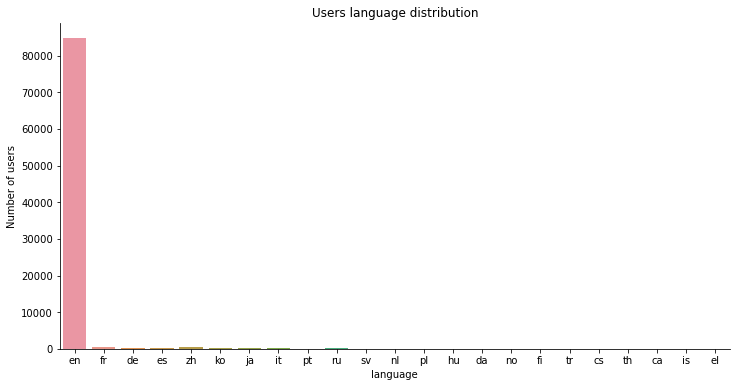

In [117]:
# country 변수 추가 
df_country=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/countries.csv")



merge_c = pd.merge(df,df_country, how='left', left_on='country_destination', right_on='country_destination')




merge_c=merge_c.drop(['lat_destination','lng_destination'],axis=1)

#결측치 제거 !! maybe other 지역 
merge_c=merge_c.dropna(axis=0)

merge_c=merge_c.drop(['language_levenshtein_distance'],axis=1)


import seaborn as sns

df_without_NDF = df[df['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df_without_NDF)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution')
sns.despine()

# 즉 다른 나라의 언어는 영어면 장땡이다. 즉 다른 나라의 언어 변수가 크게 영향을 안끼칠거라는 생각이든다
# 언어 관련 변수의 영향력은 그렇게 크지 않을꺼 같다.

merge_c=merge_c.drop(['destination_language ','language'],axis=1)

In [118]:
merge_c

id  gender        age signup_method  signup_flow  \
0      87mebub9p4    MALE  41.000000         basic            0   
1      osr2jwljor  FEMALE  36.048687         basic            0   
2      lsw9q7uk0j  FEMALE  46.000000         basic            0   
3      0d01nltbrs  FEMALE  47.000000         basic            0   
4      a1vcnhxeij  FEMALE  50.000000         basic            0   
...           ...     ...        ...           ...          ...   
86955  7plqriggxp  FEMALE  55.000000         basic            0   
86956  msucfwmlzc    MALE  43.000000         basic            0   
86957  omlc9iku7t  FEMALE  34.000000         basic            0   
86958  0k26r3mir0  FEMALE  36.000000         basic            0   
86959  qbxza0xojf  FEMALE  23.000000         basic            0   

      affiliate_channel affiliate_provider first_affiliate_tracked signup_app  \
0                direct             direct               untracked        Web   
1                 other              other                     omg        Web   
2                 other         craigslist               untracked        Web   
3                direct             direct                     omg        Web   
4                 other         craigslist               untracked        Web   
...                 ...                ...                     ...        ...   
86955         sem-brand             google                     omg        Web   
86956            direct             direct               untracked        Web   
86957            direct             direct                  linked        Web   
86958         sem-brand             google                  linked        Web   
86959         sem-brand             google                     omg        Web   

      first_browser country_destination cat_duration  distance_km  \
0            Chrome                  US            S        0.000   
1            Chrome                  US            F        0.000   
2            Safari                  US            S        0.000   
3            Safari                  US            S        0.000   
4            Safari                  US            S        0.000   
...             ...                 ...          ...          ...   
86955            IE                  FR            F     7682.945   
86956       Firefox                  US            S        0.000   
86957        Chrome                  ES            S     7730.724   
86958        Safari                  US            S        0.000   
86959            IE                  US            F        0.000   

       destination_km2  
0            9826675.0  
1            9826675.0  
2            9826675.0  
3            9826675.0  
4            9826675.0  
...                ...  
86955         643801.0  
86956        9826675.0  
86957         505370.0  
86958        9826675.0  
86959        9826675.0  

[77003 rows x 14 columns]

In [119]:
id_m=merge_c['id']



In [120]:
merge_c.head()

id  gender        age signup_method  signup_flow affiliate_channel  \
0  87mebub9p4    MALE  41.000000         basic            0            direct   
1  osr2jwljor  FEMALE  36.048687         basic            0             other   
2  lsw9q7uk0j  FEMALE  46.000000         basic            0             other   
3  0d01nltbrs  FEMALE  47.000000         basic            0            direct   
4  a1vcnhxeij  FEMALE  50.000000         basic            0             other   

  affiliate_provider first_affiliate_tracked signup_app first_browser  \
0             direct               untracked        Web        Chrome   
1              other                     omg        Web        Chrome   
2         craigslist               untracked        Web        Safari   
3             direct                     omg        Web        Safari   
4         craigslist               untracked        Web        Safari   

  country_destination cat_duration  distance_km  destination_km2  
0                  US            S          0.0        9826675.0  
1                  US            F          0.0        9826675.0  
2                  US            S          0.0        9826675.0  
3                  US            S          0.0        9826675.0  
4                  US            S          0.0        9826675.0

In [58]:
# 더미 데이터 
catvar=['gender','affiliate_channel','first_browser','cat_duration','affiliate_provider','first_affiliate_tracked']
for c in catvar:
    temp=pd.get_dummies(merge_c[c],prefix=c, drop_first=True)
    merge_c=pd.concat((merge_c,temp),axis=1)

merge_c=merge_c.drop(catvar,axis=1)


In [59]:
merge_c

id        age country_destination  distance_km  \
0      87mebub9p4  41.000000                  US        0.000   
1      osr2jwljor  36.048687                  US        0.000   
2      lsw9q7uk0j  46.000000                  US        0.000   
3      0d01nltbrs  47.000000                  US        0.000   
4      a1vcnhxeij  50.000000                  US        0.000   
...           ...        ...                 ...          ...   
86955  7plqriggxp  55.000000                  FR     7682.945   
86956  msucfwmlzc  43.000000                  US        0.000   
86957  omlc9iku7t  34.000000                  ES     7730.724   
86958  0k26r3mir0  36.000000                  US        0.000   
86959  qbxza0xojf  23.000000                  US        0.000   

       destination_km2  gender_MALE  affiliate_channel_content  \
0            9826675.0            1                          0   
1            9826675.0            0                          0   
2            9826675.0            0                          0   
3            9826675.0            0                          0   
4            9826675.0            0                          0   
...                ...          ...                        ...   
86955         643801.0            0                          0   
86956        9826675.0            1                          0   
86957         505370.0            0                          0   
86958        9826675.0            0                          0   
86959        9826675.0            0                          0   

       affiliate_channel_direct  affiliate_channel_other  \
0                             1                        0   
1                             0                        1   
2                             0                        1   
3                             1                        0   
4                             0                        1   
...                         ...                      ...   
86955                         0                        0   
86956                         1                        0   
86957                         1                        0   
86958                         0                        0   
86959                         0                        0   

       affiliate_channel_remarketing  ...  affiliate_provider_padmapper  \
0                                  0  ...                             0   
1                                  0  ...                             0   
2                                  0  ...                             0   
3                                  0  ...                             0   
4                                  0  ...                             0   
...                              ...  ...                           ...   
86955                              0  ...                             0   
86956                              0  ...                             0   
86957                              0  ...                             0   
86958                              0  ...                             0   
86959                              0  ...                             0   

       affiliate_provider_vast  affiliate_provider_yahoo  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
86955                        0                         0   
86956                        0                         0   
86957                        0                         0   
86958                        0                         0   
86959                        0                         0   

       affiliate_provider_yandex  first_affiliate_tracked_local ops  \
0                          

In [60]:
target=merge_c[['cat_duration_S']]

In [62]:
merge_c.columns

Index(['id'], dtype='object')

In [61]:
df_id=merge_c[['id']]
merge_c=merge_c.drop(['id','cat_duration_S','country_destination'],axis=1)


KeyError: "['cat_duration_S' 'country_destination'] not found in axis"

In [63]:
merge_c.dtypes

id                                 object
age                               float64
distance_km                       float64
destination_km2                   float64
gender_MALE                         uint8
                                   ...   
first_browser_Stainless             uint8
first_browser_TenFourFox            uint8
first_browser_TheWorld Browser      uint8
first_browser_wOSBrowser            uint8
cat_duration_S                      uint8
Length: 97, dtype: object

In [64]:
merge_c=merge_c.drop(['id'],axis=1)

In [65]:
target

cat_duration_S
0                   1
1                   0
2                   1
3                   1
4                   1
...               ...
86955               0
86956               1
86957               1
86958               1
86959               0

[77003 rows x 1 columns]

In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


full_model = sm.OLS(target.values,merge_c.values)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.015e+24
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        13:53:15   Log-Likelihood:                      2.0568e+06
No. Observations:               77003   AIC:                                 -4.114e+06
Df Residuals:                   76957   BIC:                                 -4.113e+06
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.029e-14    2.2e-16    -46.735      0.000   -1.07e-14   -9.86e-15
x2          6.378e-17   1.37e-18     46.658      0.000    6.11e-17    6.65e-17
x3          5.103e-20   1.14e-21     44.783      0.000    4.88e-20    5.33e-20
x4         -2.526e-15   1.46e-15     -1.726      0.084    -5.4e-15    3.43e-16
x5         -1.332e-14   1.05e-14     -1.269      0.204   -3.39e-14    7.25e-15
x6         -1.298e-14   3.87e-15     -3.359      0.001   -2.06e-14   -5.41e-15
x7         -1.788e-14   5.29e-15     -3.377      0.001   -2.83e-14    -7.5e-15
x8         -2.562e-14   1.21e-14     -2.126      0.034   -4.92e-14      -2e-15
x9         -1.382e-14   4.39e-15     -3.149      0.002   -2.24e-14   -5.22e-15
x10        -1.269e-14   4.73e-15     -2.683      0.007    -2.2e-14   -3.42e-15
x11        -1.189e-14    5.2e-15     -2.284      0.022   -2.21e-14   -1.69e-15
x12        -2.227e-15   1.46e-15     -1.521      0.128    -5.1e-15    6.42e-16
x13        -1.339e-14   1.05e-14     -1.276      0.202    -3.4e-14    7.18e-15
x14        -1.259e-14   3.87e-15     -3.256      0.001   -2.02e-14   -5.01e-15
x15        -1.772e-14   5.29e-15     -3.347      0.001   -2.81e-14   -7.34e-15
x16        -2.542e-14   1.21e-14     -2.110      0.035    -4.9e-14    -1.8e-15
x17        -1.334e-14   4.39e-15     -3.038      0.002   -2.19e-14   -4.73e-15
x18        -1.282e-14   4.73e-15     -2.711      0.007   -2.21e-14   -3.55e-15
x19        -1.163e-14    5.2e-15     -2.235      0.025   -2.18e-14   -1.43e-15
x20        -4.325e-13   4.02e-14    -10.766      0.000   -5.11e-13   -3.54e-13
x21         3.077e-14      2e-14      1.539      0.124   -8.43e-15       7e-14
x22         4.559e-12   8.13e-14     56.073      0.000     4.4e-12    4.72e-12
x23         -5.15e-13    6.8e-14     -7.570      0.000   -6.48e-13   -3.82e-13
x24        -2.937e-12   1.15e-13    -25.563      0.000   -3.16e-12   -2.71e-12
x25         2.479e-14   4.71e-15      5.264      0.000    1.56e-14     3.4e-14
x26           3.1e-14   1.66e-14      1.873      0.061   -1.44e-15    6.34e-14
x27         3.796e-13   4.95e-14      7.674      0.000    2.83e-13    4.77e-13
x28        -2.313e-12   3.04e-13     -7.616      0.000   -2.91e-12   -1.72e-12
x29         6.633e-12   1.75e-13     37.816      0.000    6.29e-12    6.98e-12
x30         2.442e-14   5.06e-15      4.831      0.000    1.45e-14    3.43e-14
x31         2.401e-14   5.74e-15      4.180      0.000    1.28e-14    3.53e-14
x32        -7.869e-13   1.15e-13     -6.850      0.000   -1.01e-12   -5.62e-13
x33        -2.499e-13   1.15e-13     -2.176      0.030   -4.75e-13   -2.48e-14
x34        -2.002e-12   1.15e-13    -17.430      0.000   -2.23e-12   -1.78e-12
x35          8.16e-13   8.43e-14      9.677      0.000    6.5

In [67]:
merge_c.columns

Index(['age', 'distance_km', 'destination_km2', 'gender_MALE',
       'affiliate_channel_content', 'affiliate_channel_direct',
       'affiliate_channel_other', 'affiliate_channel_remarketing',
       'affiliate_channel_sem-brand', 'affiliate_channel_sem-non-brand',
       'affiliate_channel_seo', 'gender_MALE', 'affiliate_channel_content',
       'affiliate_channel_direct', 'affiliate_channel_other',
       'affiliate_channel_remarketing', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_channel_seo',
       'first_browser_AOL Explorer', 'first_browser_Android Browser',
       'first_browser_Apple Mail', 'first_browser_BlackBerry Browser',
       'first_browser_Camino', 'first_browser_Chrome',
       'first_browser_Chrome Mobile', 'first_browser_Chromium',
       'first_browser_CometBird', 'first_browser_CoolNovo',
       'first_browser_Firefox', 'first_browser_IE', 'first_browser_IE Mobile',
       'first_browser_IceWeasel', 'first_browser_Iron',
  

In [68]:
rm=merge_c[['age','distance_km','destination_km2']]

In [71]:
target

cat_duration_S
0                   1
1                   0
2                   1
3                   1
4                   1
...               ...
86955               0
86956               1
86957               1
86958               1
86959               0

[77003 rows x 1 columns]

In [72]:
features=list(merge_c1.columns)

In [73]:
features

['age',
 'distance_km',
 'destination_km2',
 'gender_MALE',
 'affiliate_channel_content',
 'affiliate_channel_direct',
 'affiliate_channel_other',
 'affiliate_channel_remarketing',
 'affiliate_channel_sem-brand',
 'affiliate_channel_sem-non-brand',
 'affiliate_channel_seo',
 'gender_MALE',
 'affiliate_channel_content',
 'affiliate_channel_direct',
 'affiliate_channel_other',
 'affiliate_channel_remarketing',
 'affiliate_channel_sem-brand',
 'affiliate_channel_sem-non-brand',
 'affiliate_channel_seo',
 'first_browser_AOL Explorer',
 'first_browser_Android Browser',
 'first_browser_Apple Mail',
 'first_browser_BlackBerry Browser',
 'first_browser_Camino',
 'first_browser_Chrome',
 'first_browser_Chrome Mobile',
 'first_browser_Chromium',
 'first_browser_CometBird',
 'first_browser_CoolNovo',
 'first_browser_Firefox',
 'first_browser_IE',
 'first_browser_IE Mobile',
 'first_browser_IceWeasel',
 'first_browser_Iron',
 'first_browser_Maxthon',
 'first_browser_Mobile Firefox',
 'first_browse

In [77]:
merge_c['const']=0

In [84]:

#변수 선택법

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

 

import time
import itertools



def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
def forward(X,y,predictors):

    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
        results.append(processSubset(x=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
    



SyntaxError: invalid syntax (<ipython-input-84-c549eca65e92>, line 81)

In [79]:
Forward_best_model.summary()


/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         cat_duration_S   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.909e+32
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        13:55:49   Log-Likelihood:                      2.6057e+06
No. Observations:               77003   AIC:                                 -5.211e+06
Df Residuals:                   77000   BIC:                                 -5.211e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
cat_duration_S                1.0000    2.6e-18   3.84e+17      0.000       1.000       1.000
distance_km               -1.139e-19   5.22e-22   -218.153      0.000   -1.15e-19   -1.13e-19
first_browser_SlimBrowser -3.444e-14   2.44e-16   -141.357      0.000   -3.49e-14    -3.4e-14
first_browser_SlimBrowser -3.814e-14   2.44e-16   -156.507      0.000   -3.86e-14   -3.77e-14
const                              0          0        nan        nan           0           0
==============================================================================
Omnibus:                   250882.748   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     235339266957.124
Skew:                          54.403   Prob(JB):                         0.00
Kurtosis:                    8566.749   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""